In [2]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
df = pd.read_csv("../../RStanBook/chap04/input/data-salary.txt")

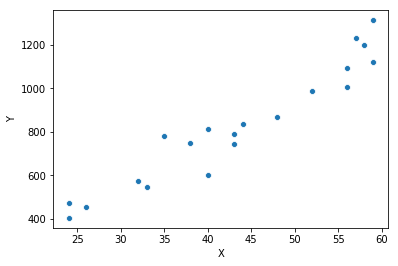

In [4]:
sns.scatterplot(data=df, x=df.X, y=df.Y)

In [5]:
result = sm.OLS(df.Y, sm.add_constant(df.X)).fit()

In [11]:
result95 = result.get_prediction().summary_frame(alpha=0.05)
result50 = result.get_prediction().summary_frame(alpha=0.5)

In [8]:
_, u, b = wls_prediction_std(result)
_, u50, b50 = wls_prediction_std(result, alpha=0.5)

(0     224.879501
 1     224.879501
 2     270.761126
 3     407.147097
 4     429.686501
 5     474.595171
 6     541.525050
 7     585.851412
 8     585.851412
 9     651.895261
 10    651.895261
 11    673.790502
 12    760.775250
 13    846.816145
 14    931.938686
 15    931.938686
 16    953.080094
 17    974.167174
 18    995.200679
 19    995.200679
 dtype: float64, 0      587.127904
 1      587.127904
 2      628.863084
 3      755.327530
 4      776.596529
 5      819.304665
 6      883.799995
 7      927.090439
 8      927.090439
 9      992.471798
 10     992.471798
 11    1014.384960
 12    1102.633824
 13    1191.826539
 14    1281.937610
 15    1281.937610
 16    1304.604606
 17    1327.325928
 18    1350.100826
 19    1350.100826
 dtype: float64)

In [12]:
result95

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,406.003702,34.290264,333.962530,478.044874,224.879501,587.127904
1,406.003702,34.290264,333.962530,478.044874,224.879501,587.127904
2,449.812105,31.727682,383.154719,516.469492,270.761126,628.863084
3,581.237314,24.693109,529.359017,633.115610,407.147097,755.327530
4,603.141515,23.658703,553.436424,652.846607,429.686501,776.596529
5,646.949918,21.760805,601.232163,692.667673,474.595171,819.304665
6,712.662522,19.462864,671.772563,753.552482,541.525050,883.799995
7,756.470925,18.403765,717.806049,795.135801,585.851412,927.090439
8,756.470925,18.403765,717.806049,795.135801,585.851412,927.090439
9,822.183529,17.695047,785.007616,859.359443,651.895261,992.471798


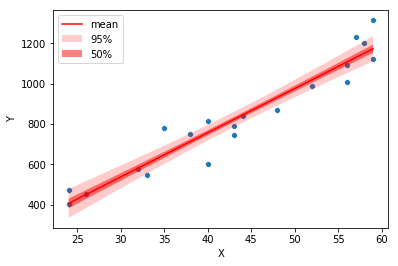

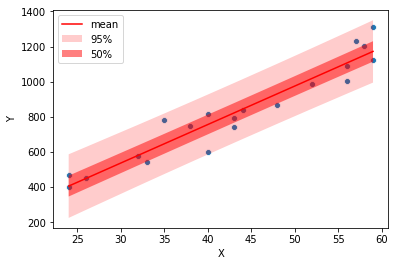

In [29]:
sns.scatterplot(data=df, x=df.X, y=df.Y)
plt.plot(df.X, result95.loc[:,"mean"], 'r')
plt.fill_between(df.X, result95.loc[:,"mean_ci_upper"], result95.loc[:,"mean_ci_lower"], facecolor='r',alpha=0.2, label="95%")
plt.fill_between(df.X, result50.loc[:,"mean_ci_upper"], result50.loc[:,"mean_ci_lower"], facecolor='r',alpha=0.5, label="50%")
plt.legend()
plt.savefig("../../output/chap4/CI.png")
plt.show()

sns.scatterplot(data=df, x=df.X, y=df.Y)
plt.plot(df.X, result95.loc[:,"mean"], 'r')
plt.fill_between(df.X, result95.loc[:,"obs_ci_upper"], result95.loc[:,"obs_ci_lower"], facecolor='r',alpha=0.2, label="95%")
plt.fill_between(df.X, result50.loc[:,"obs_ci_upper"], result50.loc[:,"obs_ci_lower"], facecolor='r',alpha=0.5, label="50%")
plt.legend()
plt.savefig("../../output/chap4/PI.png")
plt.show()

In [19]:
result95.loc[:,"mean"]

0      406.003702
1      406.003702
2      449.812105
3      581.237314
4      603.141515
5      646.949918
6      712.662522
7      756.470925
8      756.470925
9      822.183529
10     822.183529
11     844.087731
12     931.704537
13    1019.321342
14    1106.938148
15    1106.938148
16    1128.842350
17    1150.746551
18    1172.650752
19    1172.650752
Name: mean, dtype: float64